In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 915.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 5.3 MB/s eta 0:00:00
 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn as imb
%matplotlib inline

In [ ]:
from pycaret.utils import version
version()

'3.0.0'

In [ ]:
from pycaret.classification import *

In [ ]:
df = pd.read_csv("drive/MyDrive/ML_Lab_Datasets/Bankruptcy_Prediction_Preprocessed_Dataset.csv")

In [ ]:
y = df["bankrupt_"]
y

0        1
1        1
2        1
3        1
4        1
        ..
12598    1
12599    1
12600    1
12601    1
12602    1
Name: bankrupt_, Length: 12603, dtype: int64

In [ ]:
y.value_counts()

1    6510
0    6093
Name: bankrupt_, dtype: int64

In [ ]:
X  =df.drop(["bankrupt_"],axis=1)
X

,roa_c__before_interest_and_depreciation_before_interest,roa_a__before_interest_and_%_after_tax,roa_b__before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre_tax_net_interest_rate,after_tax_net_interest_rate,non_industry_income_and_expenditure_revenue,continuous_interest_rate__after_tax_,...,liability_assets_flag,net_income_to_total_assets,total_assets_to_gnp_price,no_credit_interval,gross_profit_to_sales,net_income_to_stockholder_s_equity,liability_to_equity,degree_of_financial_leverage__dfl_,interest_coverage_ratio__interest_expense_to_ebit_,equity_to_liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12598,0.340028,0.344636,0.380213,0.581466,0.581466,0.998372,0.796292,0.808283,0.302857,0.780733,...,0,0.641804,0.000376,0.623497,0.581461,0.765967,0.337315,0.026722,0.564807,0.011777
12599,0.459123,0.526875,0.511055,0.612851,0.612851,0.998869,0.797139,0.809080,0.303296,0.781365,...,0,0.793176,0.002044,0.617460,0.612849,0.839563,0.292915,0.026473,0.562992,0.015541
12600,0.337640,0.254307,0.378446,0.590842,0.590842,0.998869,0.796943,0.808897,0.302953,0.781340,...,0,0.557733,0.000847,0.623302,0.590838,0.726888,0.336515,0.026777,0.565092,0.011797
12601,0.066933,0.057185,0.054821,0.601861,0.601861,0.998825,0.796779,0.808717,0.302760,0.780927,...,1,0.525651,0.005803,0.623648,0.601857,1.000000,0.182790,0.026763,0.565021,0.009178


In [ ]:
exp_name = setup(data = X,  target = y)

,Description,Value
0,Session id,3762
1,Target,bankrupt_
2,Target type,Binary
3,Original data shape,"(12603, 95)"
4,Transformed data shape,"(12603, 95)"
5,Transformed train set shape,"(8822, 95)"
6,Transformed test set shape,"(3781, 95)"
7,Numeric features,94
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9981,1.0000,1.0000,0.9963,0.9981,0.9961,0.9962,1.6120
rf,Random Forest Classifier,0.9921,1.0000,1.0000,0.9849,0.9924,0.9841,0.9842,3.9730
lightgbm,Light Gradient Boosting Machine,0.9906,1.0000,1.0000,0.9822,0.9910,0.9812,0.9813,2.1630
xgboost,Extreme Gradient Boosting,0.9889,0.9999,1.0000,0.9790,0.9894,0.9777,0.9780,8.1540
dt,Decision Tree Classifier,0.9850,0.9845,1.0000,0.9719,0.9857,0.9700,0.9705,0.9240
gbc,Gradient Boosting Classifier,0.9647,0.9904,0.9982,0.9377,0.9670,0.9293,0.9314,16.2220
knn,K Neighbors Classifier,0.9394,0.9767,1.0000,0.8951,0.9446,0.8781,0.8848,0.2750
ada,Ada Boost Classifier,0.9329,0.9746,0.9552,0.9185,0.9363,0.8655,0.8665,3.5100
lda,Linear Discriminant Analysis,0.8728,0.9400,0.8938,0.8646,0.8788,0.7451,0.7457,0.4170
ridge,Ridge Classifier,0.8724,0.0000,0.8966,0.8620,0.8788,0.7441,0.7451,0.2920


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=3762, verbose=0, warm_start=False)

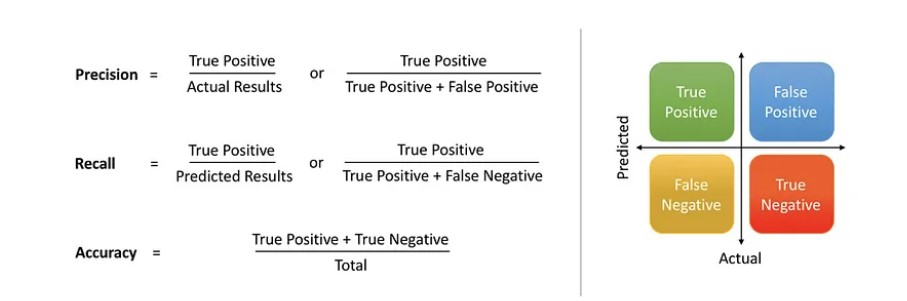

In [ ]:
print("Extra Trees Classifier")
et_clf = create_model("et")
lr_clf = create_model("lr")
et_clf_scoregrid = pull()

Extra Trees Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9966,1.0000,1.0000,0.9935,0.9967,0.9932,0.9932
1,0.9989,1.0000,1.0000,0.9978,0.9989,0.9977,0.9977
2,0.9989,1.0000,1.0000,0.9978,0.9989,0.9977,0.9977
3,0.9977,1.0000,1.0000,0.9956,0.9978,0.9955,0.9955
4,0.9966,1.0000,1.0000,0.9935,0.9967,0.9932,0.9932
5,0.9977,1.0000,1.0000,0.9956,0.9978,0.9955,0.9955
6,0.9977,1.0000,1.0000,0.9956,0.9978,0.9955,0.9955
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9989,1.0000,1.0000,0.9978,0.9989,0.9977,0.9977


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6240,0.6802,0.5636,0.6590,0.6076,0.2509,0.2537
1,0.6251,0.6637,0.5614,0.6615,0.6074,0.2533,0.2564
2,0.5986,0.6578,0.4868,0.6491,0.5564,0.2034,0.2104
3,0.6259,0.6806,0.5351,0.6740,0.5966,0.2562,0.2622
4,0.6111,0.6548,0.5329,0.6515,0.5862,0.2263,0.2304
5,0.6304,0.6810,0.5482,0.6757,0.6053,0.2648,0.2699
6,0.6327,0.7007,0.5768,0.6675,0.6188,0.2680,0.2706
7,0.6224,0.6802,0.5275,0.6704,0.5904,0.2494,0.2556
8,0.6327,0.6804,0.5648,0.6710,0.6134,0.2684,0.2720


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

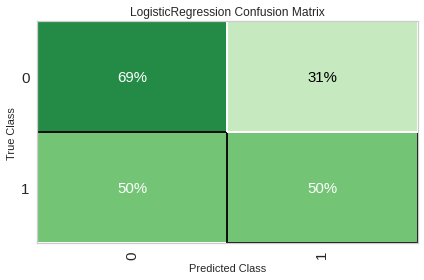

In [ ]:
plot_model(lr_clf, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})